# Table des matières

- # Sexe
    - ## [Test de chi-2](#section_1_1) - Lien entre la catégorie et le genre par un test de chi-2
<br>

- # Age
    - ## [Test de Spearman](#section_2_1) - Lien entre l'âge et le montant total des achats
<br>

- # Produits
    - ## [Test de chi-2](#section_3_1) - Lien entre la catégorie et l'âge par un test de chi-2

<br>

- # Paniers moyens
    - ## [Test de Spearman](#section_4_1) - Lien entre l'âge et le nombre de paniers    
<br>

- # Fréquence d'achats
    - ## [Test de Spearman](#section_5_1) - Calcul de la fréquence mensuelle par âges
    - ## [Test d'ANOVA](#section_5_2) - Lien entre la fréquence d'achats et l'âge
<br>

### Import des librairies ainsi que leurs versions

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from statsmodels.formula.api import ols

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

!python --version
print('\n'.join(f'{m.__name__} {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

Python 3.9.12
pandas 1.4.2
numpy 1.21.5
seaborn 0.11.2
statsmodels.api 0.13.2


### Options d'affichage

In [2]:
# Affichage de seulement deux chiffres après la virgule
pd.options.display.float_format = "{:.2f}".format

# Taille de la figure par défaut
plt.rcParams["figure.figsize"] = (20,3)

# Taille de la police d'écriture par défaut dans une figure
plt.rcParams.update({'font.size': 18})

# Affichage de multiples displays en lignes, plutôt qu'en colonne
from IPython.display import display, HTML, display_html

CSS = """
.output {
    flex-direction: row;
    
}
"""

HTML('<style>{}</style>'.format(CSS))

### Import du dataframe

In [4]:
df_final = pd.read_csv('df_final.csv', index_col=0)

### Modification du dataframe

In [9]:
# Création d'une copie du dataframe pour ensuite enlever les clients B2B sans perdre de données
df_B2C = df_final.copy()

In [10]:
# Supressions des clients B2B dans le dataframe B2C
df_B2C.drop(df_B2C[(df_B2C["client_id"] == "c_1609")].index, inplace=True)
df_B2C.drop(df_B2C[(df_B2C["client_id"] == "c_4958")].index, inplace=True)
df_B2C.drop(df_B2C[(df_B2C["client_id"] == "c_6714")].index, inplace=True)
df_B2C.drop(df_B2C[(df_B2C["client_id"] == "c_3454")].index, inplace=True)

In [11]:
df_B2C.shape

(632689, 13)

In [12]:
df_final.shape

(679332, 13)

# Sexe

## <a class="anchor" id="section_1_1">Test de chi-2</a> - Lien entre la catégorie et le genre par un test de chi-2

In [5]:
categ_sex = pd.crosstab(df_final['sex'], df_final['categ'])
display(categ_sex)

categ,0,1,2
sex,,,
f,206220,114899,17283
m,209460,112270,19200


In [6]:
chi2, pvalue, dof, exp = st.chi2_contingency(categ_sex)

print(f"La pvalue est de", pvalue)

La pvalue est de 1.1989607410166063e-32


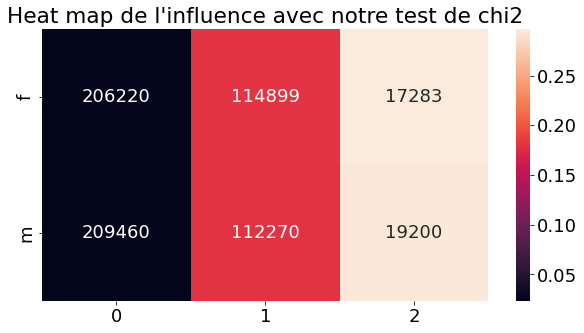

In [7]:
length_i = categ_sex.shape[0]
length_j = categ_sex.shape[1]


xij = np.zeros((length_i, length_j))

for i in range(length_i):
    for j in range(length_j):
        xij[i,j] = (categ_sex.values[i,j] - exp[i,j]) ** 2 / exp[i,j]

plt.figure(figsize=(10, 5))      
sns.heatmap(xij/chi2,
           annot=categ_sex,
           fmt='d',
           yticklabels=['f', 'm'])

plt.title("Heat map de l'influence avec notre test de chi2")
plt.show()

Grâce à ce test de chi-2, l'hypothèse nulle est rejetée. L'achat de produits dans une catégorie ne dépend pas du genre de l'acheteur.

# Age

## <a class="anchor" id="section_2_1">Test de Spearman</a> - Lien entre l'âge et le montant total des achats

Comme ce n'est pas une distribution normale au vu des précédents résulats, le test de Spearman peut être intéressant.

In [13]:
age = df_B2C.groupby(["age"])["client_id"].count()
total_achats_age = df_B2C.groupby(["age"])["price"].sum()

display(age, total_achats_age)

age
18    15149
19     4371
20     4587
21     4252
22     4415
      ...  
89      327
90      311
91      170
92      226
93      201
Name: client_id, Length: 76, dtype: int64

age
18   609013.69
19   178195.78
20   184209.27
21   178497.70
22   165029.26
        ...   
89     5264.99
90     5043.19
91     2815.45
92     4013.87
93     3221.85
Name: price, Length: 76, dtype: float64

In [14]:
# Corrélation entre les informations concernant l'âge et le montant total des achats effectués par ceux-ci
print("Spearman ", st.spearmanr(total_achats_age.index, total_achats_age.values))

Spearman  SpearmanrResult(correlation=-0.8736842105263158, pvalue=7.352708223159905e-25)


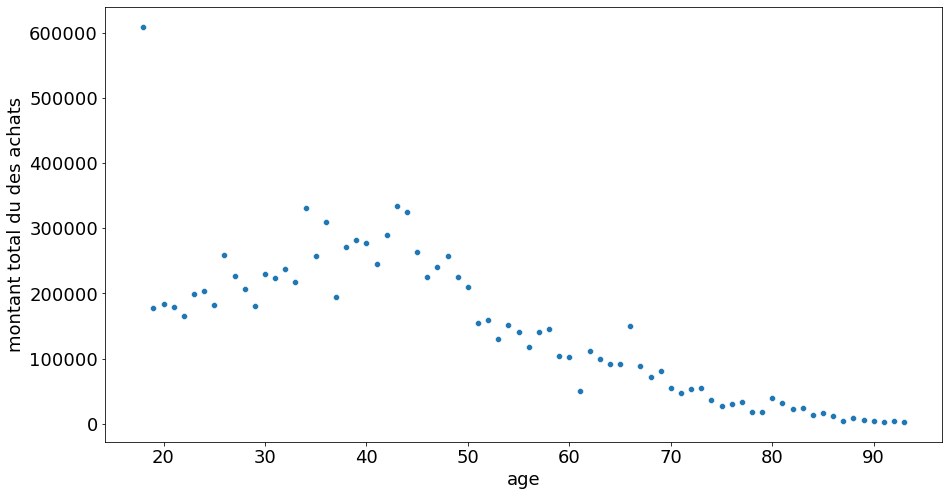

In [15]:
# Création d'un graphique pour visualiser notre test de Spearman

plt.figure(figsize=(15, 8))
sns.scatterplot(data=total_achats_age)
plt.ylabel("montant total du des achats")
plt.show()

# Produits

## <a class="anchor" id="section_3_1">Test de chi-2</a> - Lien entre la catégorie et l'âge par un test de chi-2

In [16]:
age_categ = df_B2C[['range age', 'categ']]
display(age_categ.head())

,range age,categ
0,35-39,0
1,35-39,0
2,35-39,0
3,35-39,0
4,35-39,0


In [17]:
# Création d'un tableau de contingence
X = "range age"
Y = "categ"

age_categ_cont = df_B2C[[X, Y]].pivot_table(index=X,
                                           columns=Y,
                                           aggfunc=len,
                                           margins=True,
                                           margins_name="Total")

age_categ_cont

categ,0,1,2,Total
range age,,,,
18-23,8601,14222,14997,37820
24-28,5813,9897,10763,26473
29-34,60527,21475,4441,86443
35-39,75737,23497,320,99554
40-44,83787,26260,450,110497
45-50,81656,25547,383,107586
51-55,19131,24421,402,43954
56-60,15614,20410,309,36333
61-66,15491,19485,349,35325


In [18]:
chi2, pvalue, dof, exp = st.chi2_contingency(age_categ_cont)

print(f"La pvalue est de", pvalue)

La pvalue est de 0.0


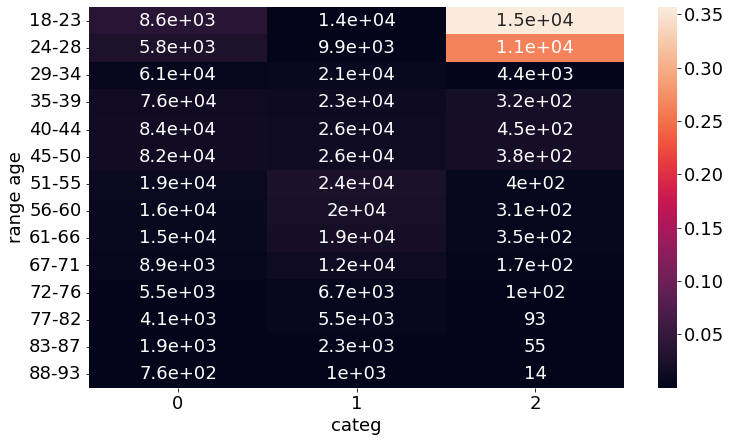

In [19]:
tx = age_categ_cont.loc[:, ['Total']]
ty = age_categ_cont.loc[["Total"], :]
n = (len(df_B2C))
indep = tx.dot(ty) / n

c = age_categ_cont.fillna(0)
measure = (c - indep) ** 2 / indep
xi_n = measure.sum().sum()
table = measure/xi_n

plt.figure(figsize=(12,7))
sns.heatmap(table.iloc[:-1, :-1], annot=c.iloc[:-1, :-1])
plt.show()

Il y a une forte corrélation par rapport aux clients de 18-28 ans pour la catégorie 2.

# Paniers moyens

## <a class="anchor" id="section_4_1">Test de Spearman</a> - Lien entre l'âge et le nombre de paniers

In [20]:
nbr_achats_session = df_B2C.groupby(['age'])['session_id'].count()

In [21]:
# Corrélation entre les informations concernant l'âge et le nombre total des achats effectués par ceux-ci
print("Spearman ", st.spearmanr(nbr_achats_session.index, nbr_achats_session.values))

Spearman  SpearmanrResult(correlation=-0.6738482570061518, pvalue=2.5391854434818517e-11)


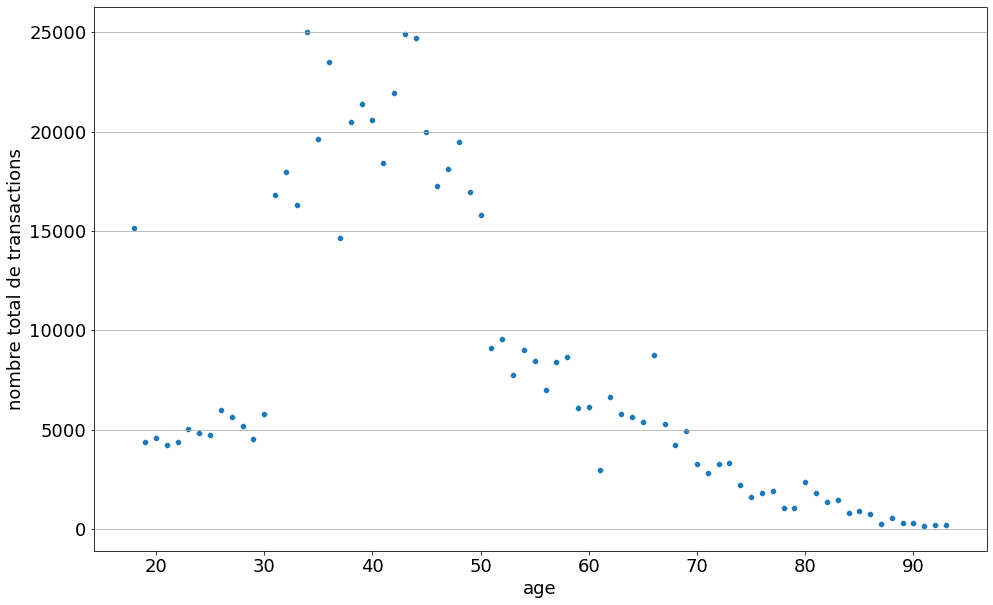

In [22]:
fig = plt.figure(1, figsize=(16,10))
sns.scatterplot(data=nbr_achats_session)
plt.grid(axis='y')
plt.ylabel("nombre total de transactions")
plt.show()

Grâce à ce test de Spearman, le résultat montre que les clients de moins de 30 ans ont effectués moins d'achats que la tranche d'âge suivante (30-50 ans).
Mais ce n'est pas pour autant que ça n'impacte pas le chiffre d'affaires, car d'autres résultats ont montré la somme rapportée.

# Fréquence d'achats

## <a class="anchor" id="section_5_1">Test de Spearman</a> - Calcul de la fréquence mensuelle par âges

In [27]:
def frequence(x):
    d = {}
    d["frequence"] = (x['session_id'].count() / x['client_id'].value_counts().count())
    return pd.Series(d, index=['frequence'])

In [28]:
df_range_age_frequence = df_B2C.groupby(['year', 'month', 'range age']).apply(frequence)

In [33]:
df_range_age_frequence = df_range_age_frequence.reset_index()
df_range_age_frequence

,year,month,range age,frequence
0,2021,3,18-23,2.66
1,2021,3,24-28,2.57
2,2021,3,29-34,5.91
3,2021,3,35-39,6.87
4,2021,3,40-44,6.38
...,...,...,...,...
331,2023,2,67-71,2.94
332,2023,2,72-76,3.12
333,2023,2,77-82,3.09
334,2023,2,83-87,2.63


In [23]:
age_freq = df_B2C.groupby('age').count().reset_index()
age_freq = age_freq[['age', 'session_id']]
age_freq['freq age'] = age_freq['session_id'] / sum(age_freq['session_id'])
age_freq.head()

,age,session_id,freq age
0,18,15149,0.02
1,19,4371,0.01
2,20,4587,0.01
3,21,4252,0.01
4,22,4415,0.01


In [24]:
print("Corrélation de Spearman: ", st.spearmanr(age_freq['age'], age_freq['session_id']))

Corrélation de Spearman:  SpearmanrResult(correlation=-0.6738482570061518, pvalue=2.5391854434818517e-11)


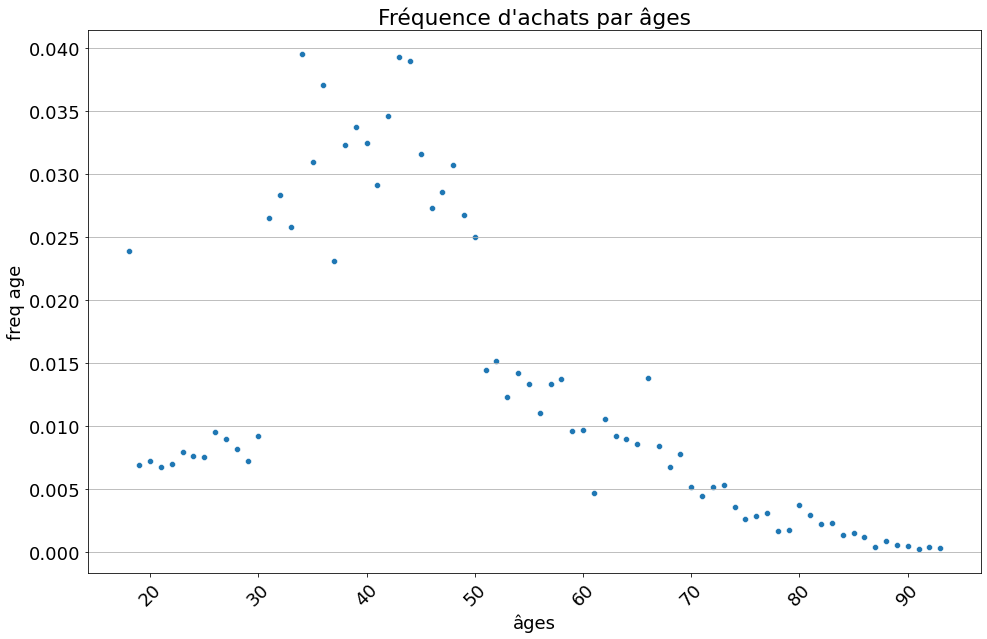

In [25]:
fig = plt.figure(1, figsize=(16,10))
sns.scatterplot(x='age', 
            y='freq age', 
            data=age_freq)
plt.grid(axis='y')
plt.title("Fréquence d'achats par âges")
plt.xticks(rotation=45)
plt.xlabel("âges")
plt.show()

## <a class="anchor" id="section_5_2">Test d'ANOVA</a> - Lien entre la fréquence d'achats et l'âge

[Utilisation d'ANOVA pour ce test](https://www.statsmodels.org/stable/anova.html)

[Informations supplémentaires concernant le test d'ANOVA](https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html)

In [35]:
df_range_age_frequence = df_range_age_frequence.rename(columns = {
    'range age' : 'range_age'
})

In [36]:
lm = ols('frequence ~ range_age', data = df_range_age_frequence).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
range_age,13.00,648.15,49.86,326.96,0.00
Residual,322.00,49.10,0.15,NaN,NaN


In [37]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequence   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     327.0
Date:                Mon, 31 Oct 2022   Prob (F-statistic):          1.08e-176
Time:                        13:54:16   Log-Likelihood:                -153.66
No. Observations:                 336   AIC:                             335.3
Df Residuals:                     322   BIC:                             388.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6982      0.080     33.850      0.000       2.541       2.855
range_age[T.24-28]     0.0340      0.113      0.302      0.763      -0.188       0.256
range_age[T.29-34]     2.8213      0.113     25.028      0.000       2.600       3.043
range_age[T.35-39]     3.9754      0.113     35.266      0.000       3.754       4.197
range_age[T.40-44]     3.6594      0.113     32.463      0.000       3.438       3.881
range_age[T.45-50]     3.6038      0.113     31.969      0.000       3.382       3.826
range_age[T.51-55]     0.6938      0.113      6.154      0.000       0.472       0.916
range_age[T.56-60]     0.7887      0.113      6.997      0.000       0.567       1.010
range_age[T.61-66]     0.6700      0.113      5.943      0.000       0.448       0.892
range_age[T.67-71]     0.6113      0.113      5.422      0.000       0.389       0.833
range_age[T.72-76]     0.6661      0.113      5.909      0.000       0.444       0.888
range_age[T.77-82]     0.5876      0.113      5.213      0.000       0.366       0.809
range_age[T.83-87]     0.6310      0.113      5.598      0.000       0.409       0.853
range_age[T.88-93]     0.5305      0.113      4.706      0.000       0.309       0.752
==============================================================================
Omnibus:                       29.384   Durbin-Watson:                   0.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.192
Skew:                          -0.011   Prob(JB):                     3.25e-29
Kurtosis:                       6.061   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le R-squared est à 0.93. Nous avons donc une relation entre l'âge et la fréquence d'achats. Ce résultat est intéressant pour interprêter un pourcentage de variation.<br />

## Conclusion


D'après l'analyse, la librairie se porte bien. La clientèle B2B est présente dans chaque catégorie et amène plus ou moins de clients B2C fidèles pour ces catégories.<br />

Côté clientèle C2C, elle rapporte plusieurs informations. Des parents qui achètent pour leurs enfants ou pour eux-mêmes. Une clientèle adulte qui revient souvent pour effectuer des achats. Une clientèle jeune qui revient moins souvent mais repartent avec un panier plus élevé.<br />